In [ ]:
#Import data manipulation libraries
import pandas as pd
import numpy as np
import math
#Import the visualization libraries
import seaborn as sn
import matplotlib.pyplot as plt

#import access
import os

#Report
import tensorboard
import time

#Time
import datetime as datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Skripsi/data-firebase/week1-4 and 5half.csv')
df.drop(['z_count', '_key', 'Date', 'Month', 'Day', 'Hour', 'Minute', 'bitSoilSensor1', 'bitSoilSensor2', 'voltageSoilSense1', 'voltageSoilSense2', 'Unnamed: 0', 'percentageSoilSensor1'], axis=1, inplace=True)
display(df.head())
original_df = df.copy(deep=True)

,Ts,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
0,1648517134650,82,99.6,30.0,0.0,1
1,1648517734661,83,98.1,30.0,0.0,1
2,1648518334670,81,98.9,30.2,0.0,1
3,1648518934692,82,98.7,30.5,0.0,1
4,1648519534633,84,97.5,31.0,0.0,1


In [ ]:
def features_build(df):
    df["Date"] = pd.to_datetime(df["Ts"], unit='ms')
    df["Date"] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')
    df["Date"] = df['Date'].dt.tz_localize(None)
features_build(df)
df.set_index('Date', inplace=True)
df.drop(['Ts'], axis=1, inplace=True)
df.head()

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-03-29 08:25:34.650,82,99.6,30.0,0.0,1
2022-03-29 08:35:34.661,83,98.1,30.0,0.0,1
2022-03-29 08:45:34.670,81,98.9,30.2,0.0,1
2022-03-29 08:55:34.692,82,98.7,30.5,0.0,1
2022-03-29 09:05:34.633,84,97.5,31.0,0.0,1


In [ ]:
df.mean()

percentageSoilSensor2    89.324216
roomHumidity             97.889962
roomTemperature          29.193501
status                    0.008030
week                      2.795985
dtype: float64

## Week 1

In [ ]:
timeVariableVisualizationWeek1 = df[df.week == 1]
timeVariableVisualizationWeek1.tail(5)

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-04-04 20:04:01.232,89,98.8,29.7,0.0,1
2022-04-04 20:14:01.235,90,98.8,29.6,0.0,1
2022-04-04 20:24:01.236,91,98.8,29.4,0.0,1
2022-04-04 20:34:01.215,90,98.3,29.3,0.0,1
2022-04-04 20:44:01.225,91,99.1,29.2,0.0,1


In [ ]:
timeVariableVisualizationWeek1.mean()

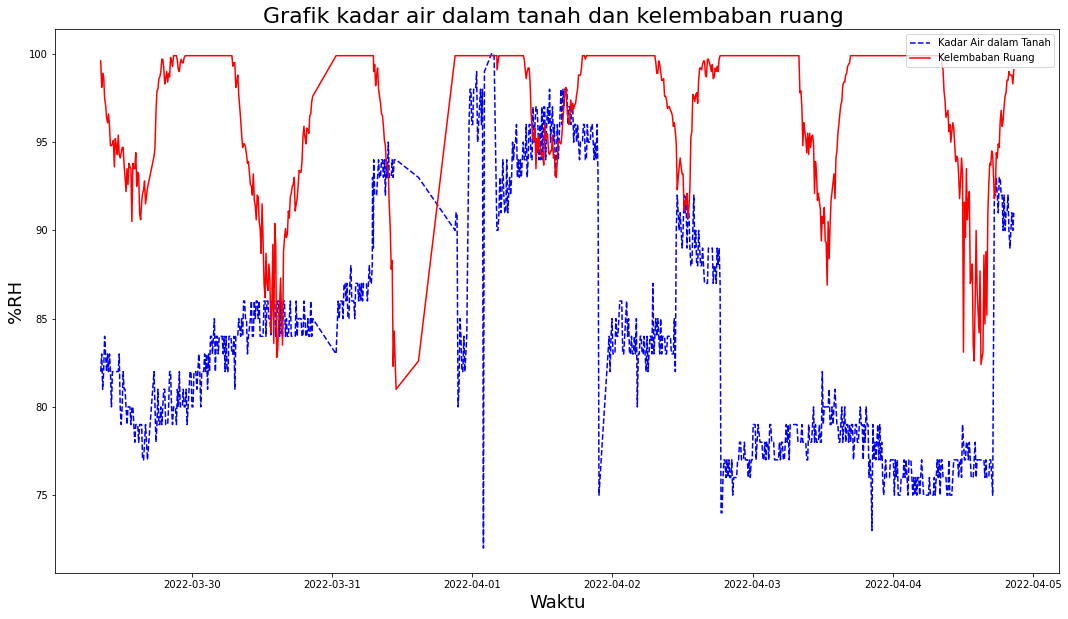

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor2'], color='blue', linestyle='dashed')
plt.plot(timeVariableVisualizationWeek1['roomHumidity'], color='red')
# plt.plot(timeVariableVisualizationWeek1['roomTemperature'], color='red')
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

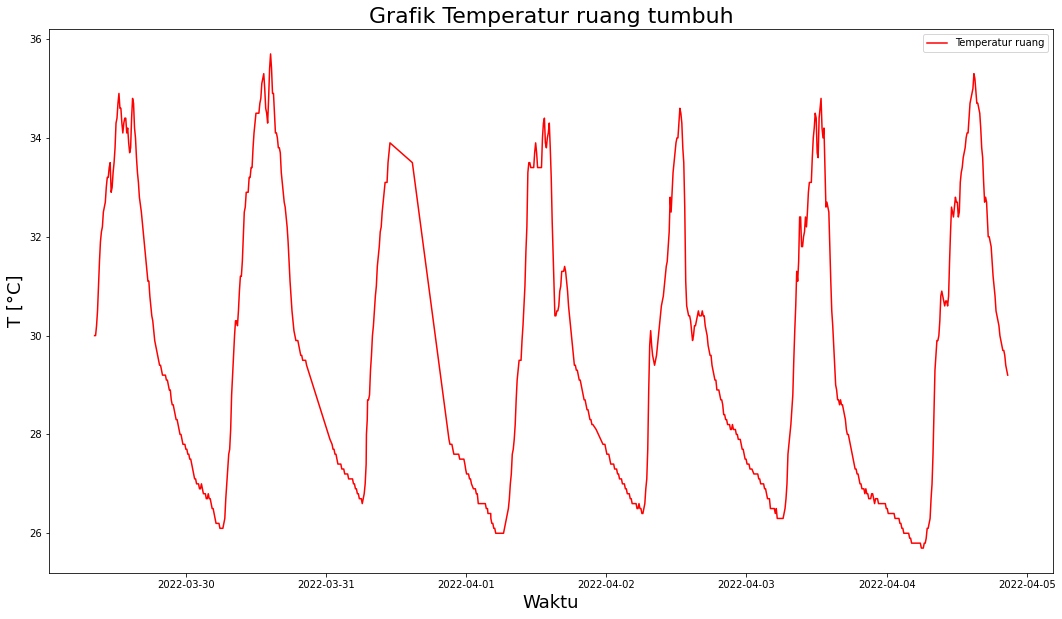

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek1['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek1['roomTemperature'], color='red')
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

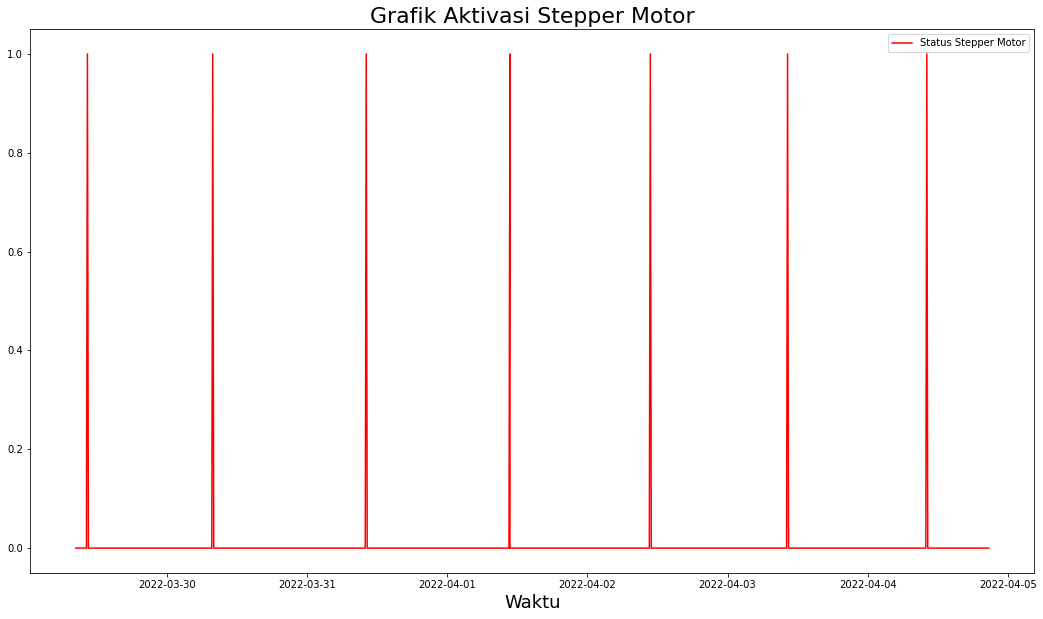

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek1['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek1['status'], color='red')
plt.legend(['Status Stepper Motor'], loc ="upper right")
plt.title('Grafik Aktivasi Stepper Motor', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('', fontsize=18)
plt.show()

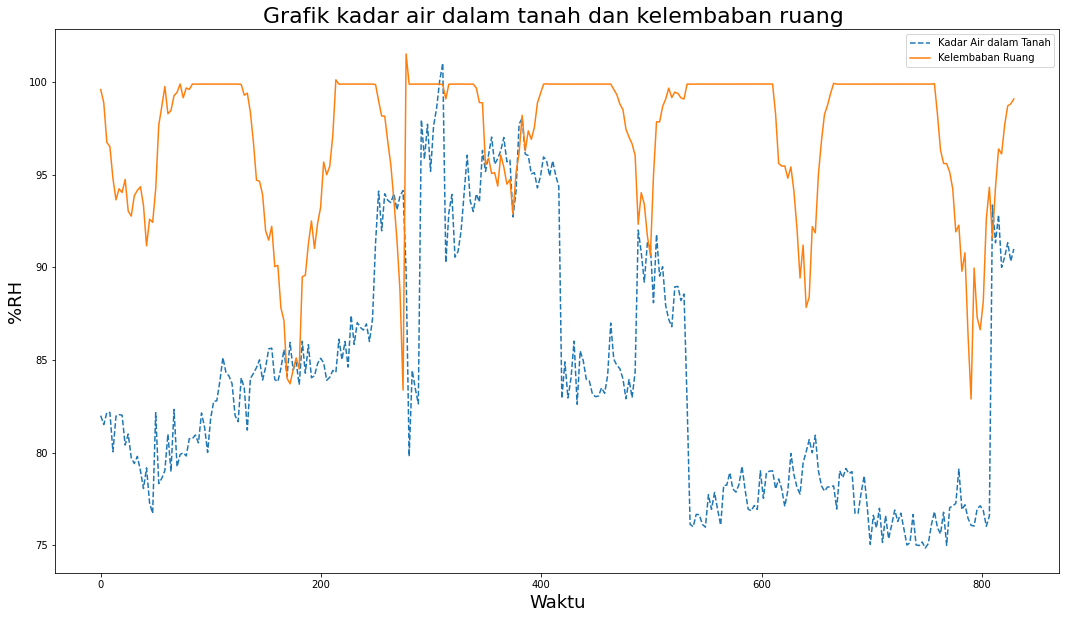

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# create integers from strings
idx = range(len(timeVariableVisualizationWeek1.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek1['percentageSoilSensor2'], k=3)
spl2 = make_interp_spline(idx, timeVariableVisualizationWeek1['roomHumidity'], k=3)
smooth = spl(xnew)
smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth, linestyle='dashed')
plt.plot(xnew, smooth2)
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

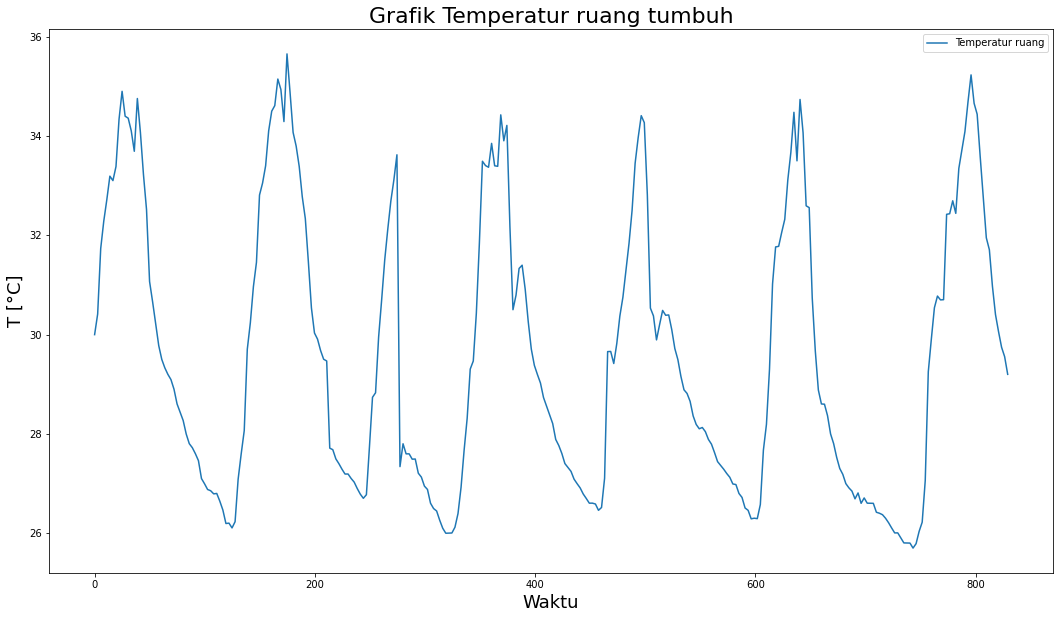

In [ ]:
# create integers from strings
idx = range(len(timeVariableVisualizationWeek1.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek1['roomTemperature'], k=3)
# spl2 = make_interp_spline(idx, timeVariableVisualizationWeek1['roomHumidity'], k=3)
smooth = spl(xnew)
# smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth)
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

In [ ]:
display(timeVariableVisualizationWeek1.head(50))

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-03-29 08:25:34.650,82,99.6,30.0,0.0,1
2022-03-29 08:35:34.661,83,98.1,30.0,0.0,1
2022-03-29 08:45:34.670,81,98.9,30.2,0.0,1
2022-03-29 08:55:34.692,82,98.7,30.5,0.0,1
2022-03-29 09:05:34.633,84,97.5,31.0,0.0,1
2022-03-29 09:15:34.680,83,97.1,31.5,0.0,1
2022-03-29 09:25:34.615,82,96.4,31.9,0.0,1
2022-03-29 09:35:34.611,83,96.1,32.1,0.0,1
2022-03-29 09:45:34.603,82,96.6,32.2,0.0,1


## Week 2

In [ ]:
timeVariableVisualizationWeek2 = df[df.week == 2]
timeVariableVisualizationWeek2.tail(5)

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-04-11 10:14:30.530,94,89.9,33.0,0.0,2
2022-04-11 10:24:30.532,93,87.2,33.2,0.0,2
2022-04-11 10:34:30.516,93,87.7,33.3,0.0,2
2022-04-11 10:44:30.521,94,84.3,33.6,0.0,2
2022-04-11 10:54:30.505,94,83.6,34.0,0.0,2


In [ ]:
timeVariableVisualizationWeek2.mean()

percentageSoilSensor2    90.647792
roomHumidity             97.001359
roomTemperature          29.007135
status                    0.006795
week                      2.000000
dtype: float64

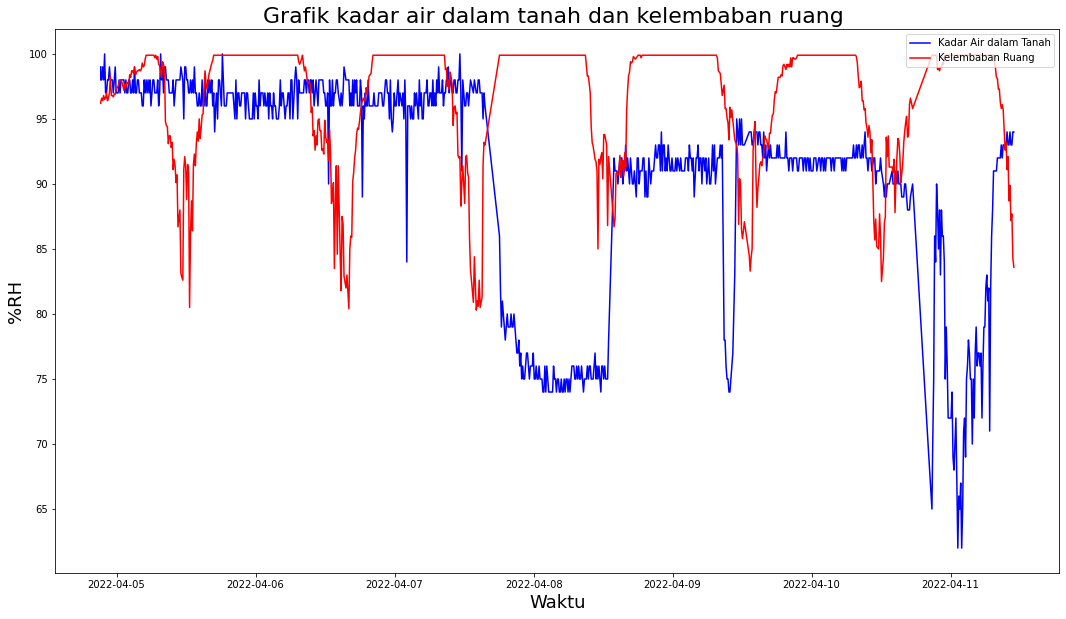

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek2['percentageSoilSensor2'], color='blue')
plt.plot(timeVariableVisualizationWeek2['roomHumidity'], color='red')
# plt.plot(timeVariableVisualizationWeek2['roomTemperature'], color='red')
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

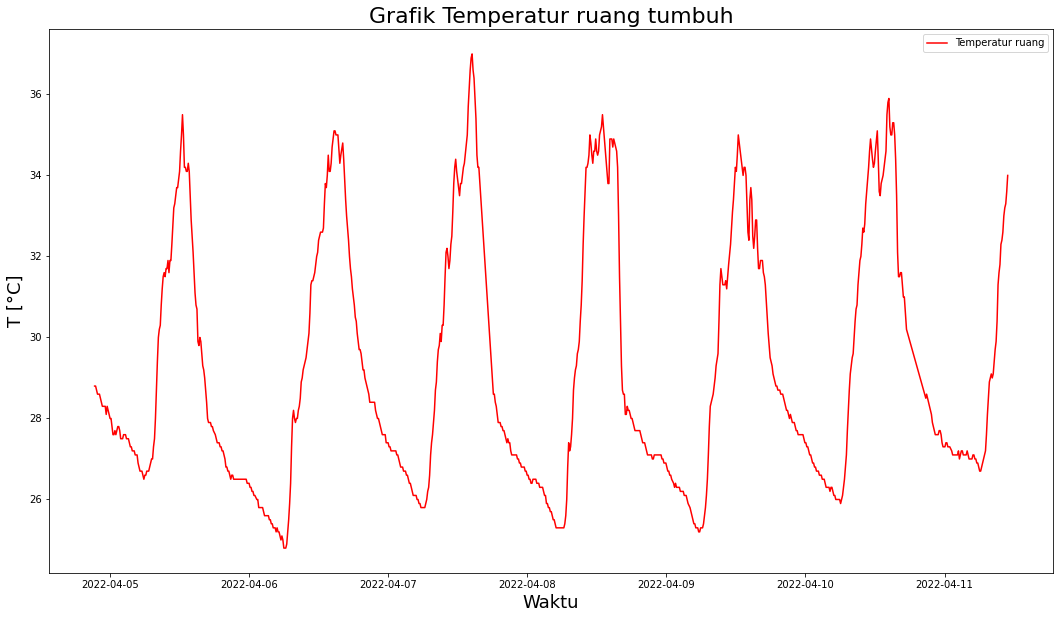

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek2['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek2['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek2['roomTemperature'], color='red')
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

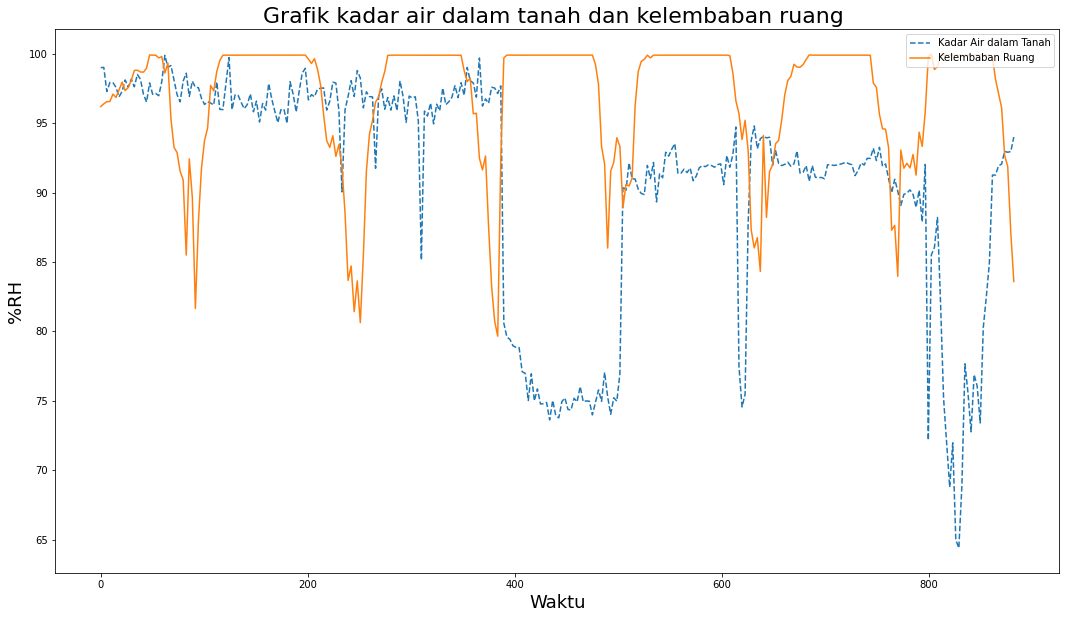

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# create integers from strings
idx = range(len(timeVariableVisualizationWeek2.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek2['percentageSoilSensor2'], k=3)
spl2 = make_interp_spline(idx, timeVariableVisualizationWeek2['roomHumidity'], k=3)
smooth = spl(xnew)
smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth, linestyle='dashed')
plt.plot(xnew, smooth2)
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

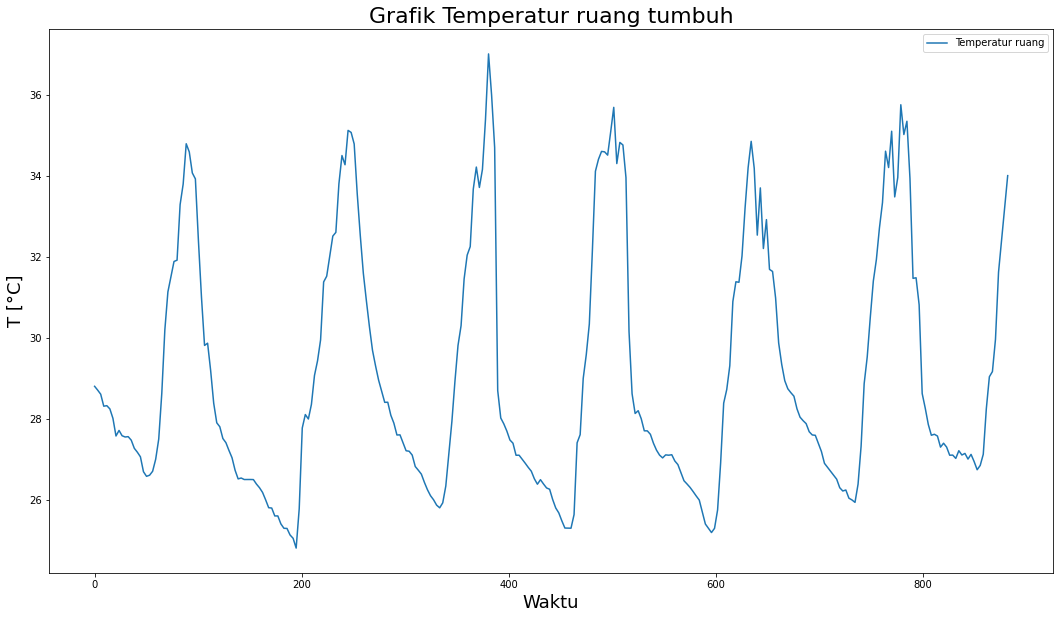

In [ ]:
# create integers from strings
idx = range(len(timeVariableVisualizationWeek2.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek2['roomTemperature'], k=3)
# spl2 = make_interp_spline(idx, timeVariableVisualizationWeek2['roomHumidity'], k=3)
smooth = spl(xnew)
# smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth)
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

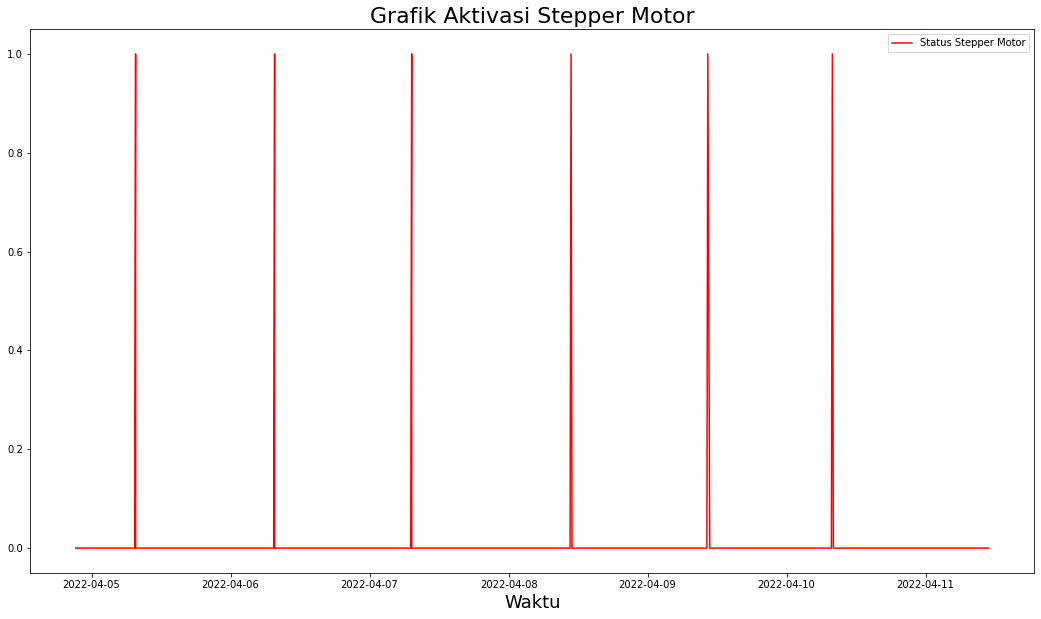

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek1['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek2['status'], color='red')
plt.legend(['Status Stepper Motor'], loc ="upper right")
plt.title('Grafik Aktivasi Stepper Motor', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('', fontsize=18)
plt.show()

## Week 3

In [ ]:
timeVariableVisualizationWeek3 = df[df.week == 3]
timeVariableVisualizationWeek3.tail(5)

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-04-18 08:30:52.060,93,99.9,32.6,0.0,3
2022-04-18 08:40:52.032,93,99.9,32.8,0.0,3
2022-04-18 08:50:52.029,91,99.9,33.1,0.0,3
2022-04-18 09:00:52.024,92,99.9,33.5,0.0,3
2022-04-18 09:10:52.040,92,99.9,33.4,0.0,3


In [ ]:
timeVariableVisualizationWeek3.mean()

percentageSoilSensor2    90.432773
roomHumidity             97.709034
roomTemperature          29.410189
status                    0.009454
week                      3.000000
dtype: float64

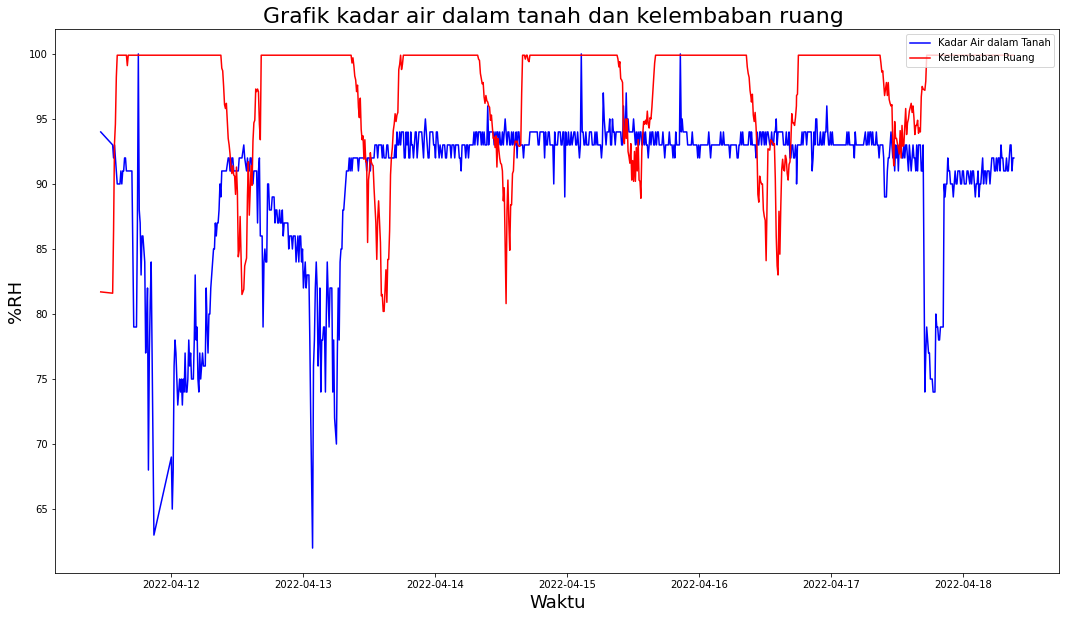

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek3['percentageSoilSensor2'], color='blue')
plt.plot(timeVariableVisualizationWeek3['roomHumidity'], color='red')
# plt.plot(timeVariableVisualizationWeek3['roomTemperature'], color='red')
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

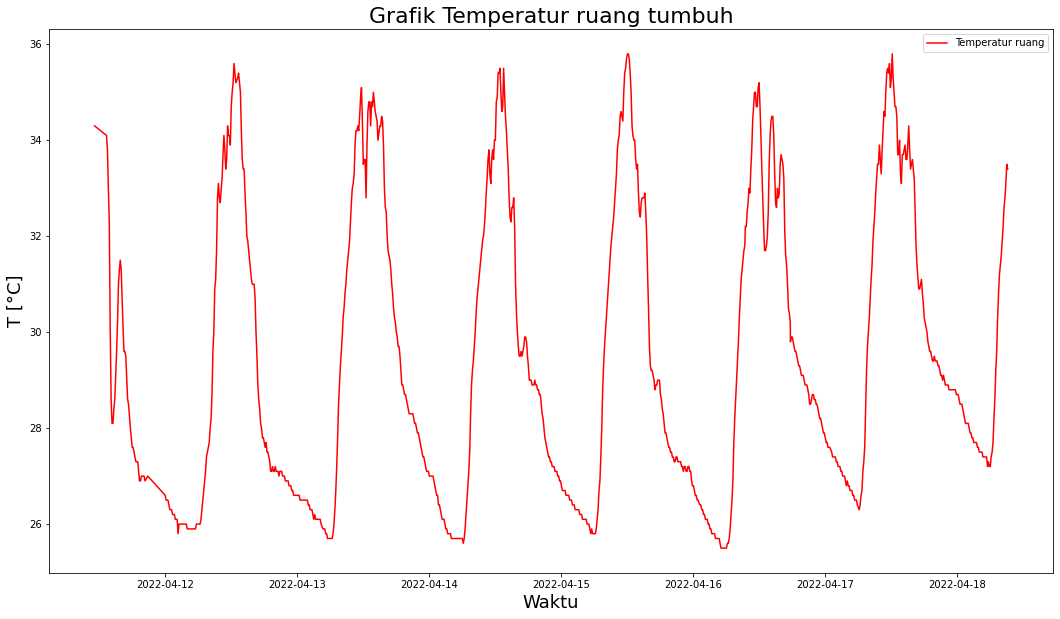

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek3['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek3['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek3['roomTemperature'], color='red')
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

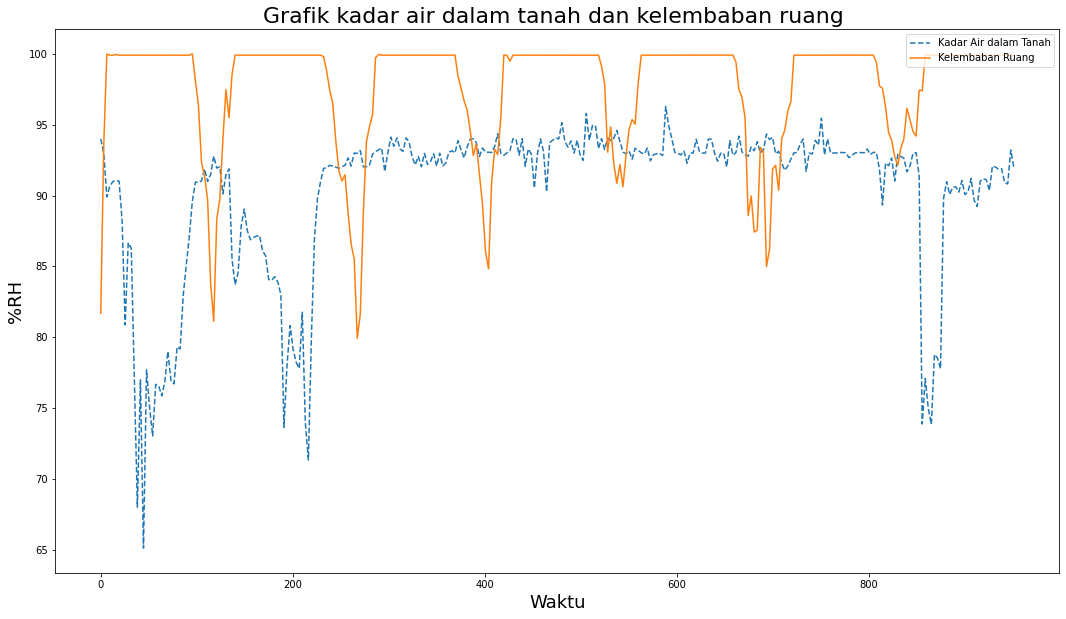

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# create integers from strings
idx = range(len(timeVariableVisualizationWeek3.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek3['percentageSoilSensor2'], k=3)
spl2 = make_interp_spline(idx, timeVariableVisualizationWeek3['roomHumidity'], k=3)
smooth = spl(xnew)
smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth, linestyle='dashed')
plt.plot(xnew, smooth2)
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

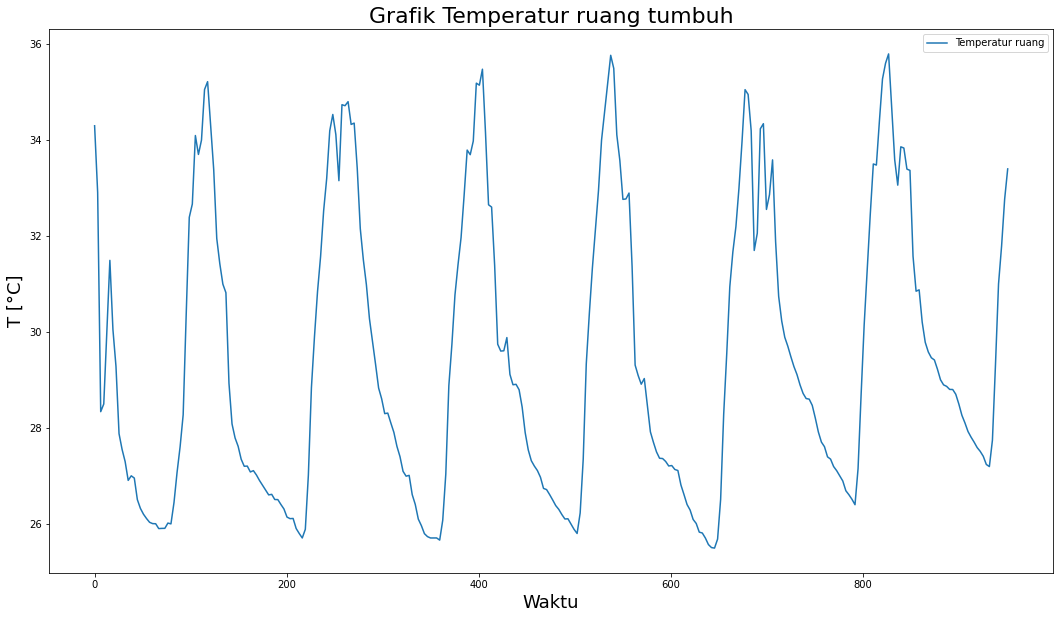

In [ ]:
# create integers from strings
idx = range(len(timeVariableVisualizationWeek3.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek3['roomTemperature'], k=3)
# spl2 = make_interp_spline(idx, timeVariableVisualizationWeek3['roomHumidity'], k=3)
smooth = spl(xnew)
# smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth)
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

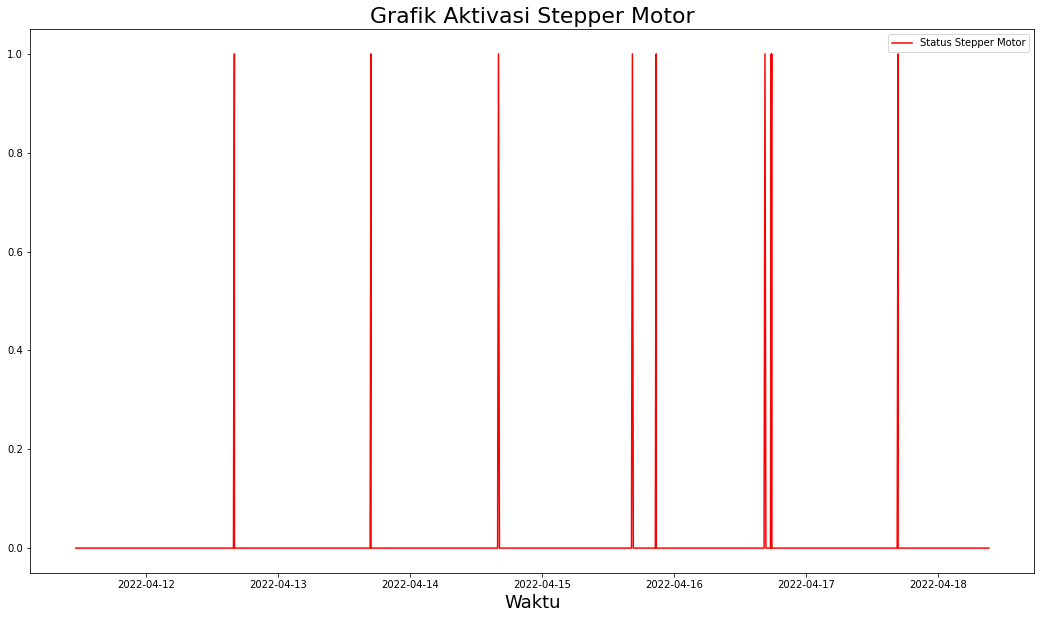

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek3['status'], color='red')
plt.legend(['Status Stepper Motor'], loc ="upper right")
plt.title('Grafik Aktivasi Stepper Motor', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('', fontsize=18)
plt.show()

## Week 4

In [ ]:
timeVariableVisualizationWeek4 = df[df.week == 4]
timeVariableVisualizationWeek4.tail(5)

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-04-25 16:04:48.125,81,99.9,32.5,0.0,4
2022-04-25 16:14:48.167,80,99.9,31.9,0.0,4
2022-04-25 16:24:48.124,80,99.9,31.2,0.0,4
2022-04-25 16:34:48.114,95,99.9,30.6,1.0,4
2022-04-25 16:34:59.565,95,99.9,30.6,0.0,4


In [ ]:
timeVariableVisualizationWeek4.mean()

percentageSoilSensor2    89.597802
roomHumidity             99.014945
roomTemperature          28.913956
status                    0.008791
week                      4.000000
dtype: float64

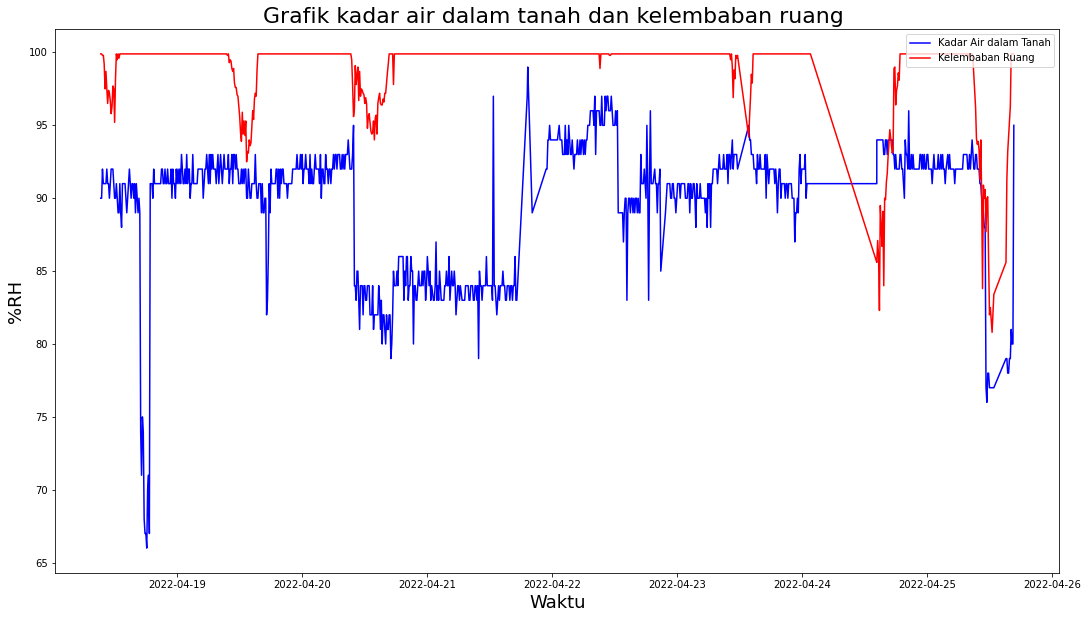

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek4['percentageSoilSensor2'], color='blue')
plt.plot(timeVariableVisualizationWeek4['roomHumidity'], color='red')
# plt.plot(timeVariableVisualizationWeek4['roomTemperature'], color='red')
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

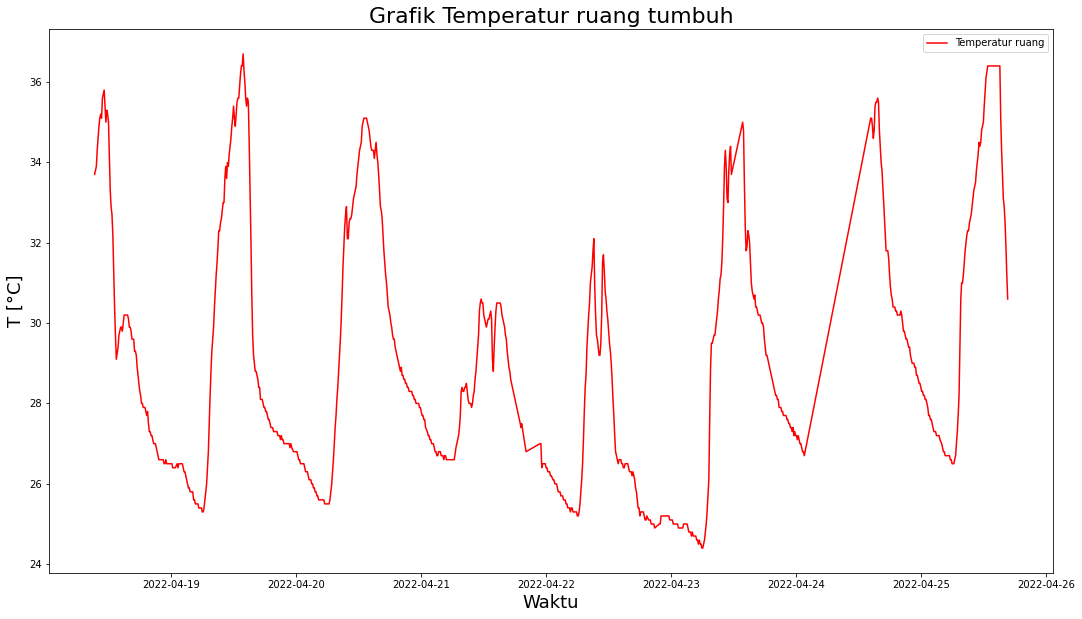

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek4['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek4['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek4['roomTemperature'], color='red')
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

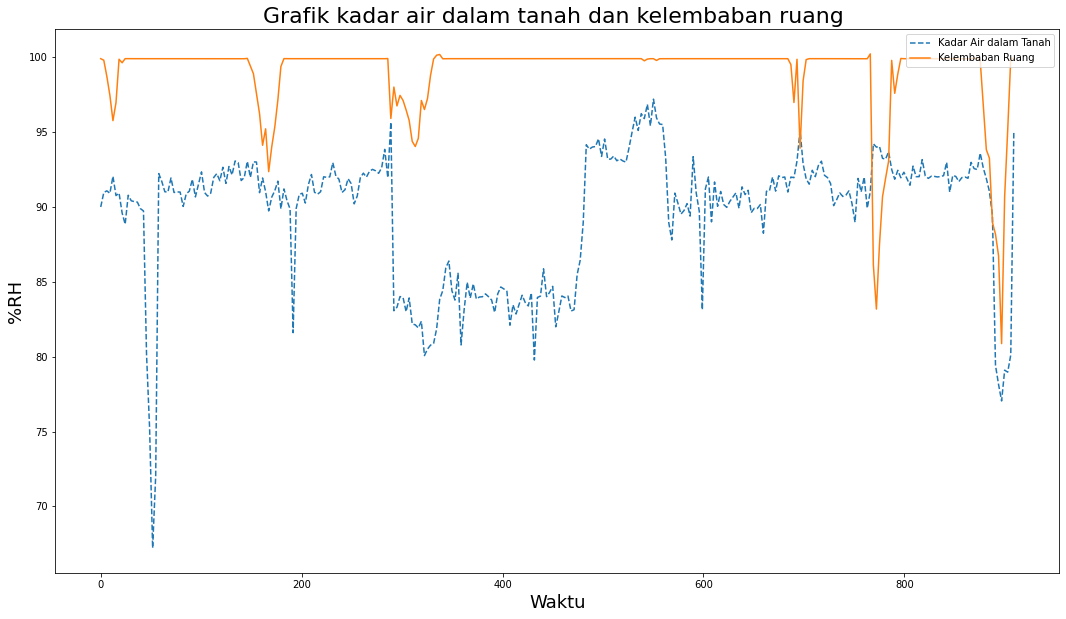

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# create integers from strings
idx = range(len(timeVariableVisualizationWeek4.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek4['percentageSoilSensor2'], k=3)
spl2 = make_interp_spline(idx, timeVariableVisualizationWeek4['roomHumidity'], k=3)
smooth = spl(xnew)
smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth, linestyle='dashed')
plt.plot(xnew, smooth2)
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

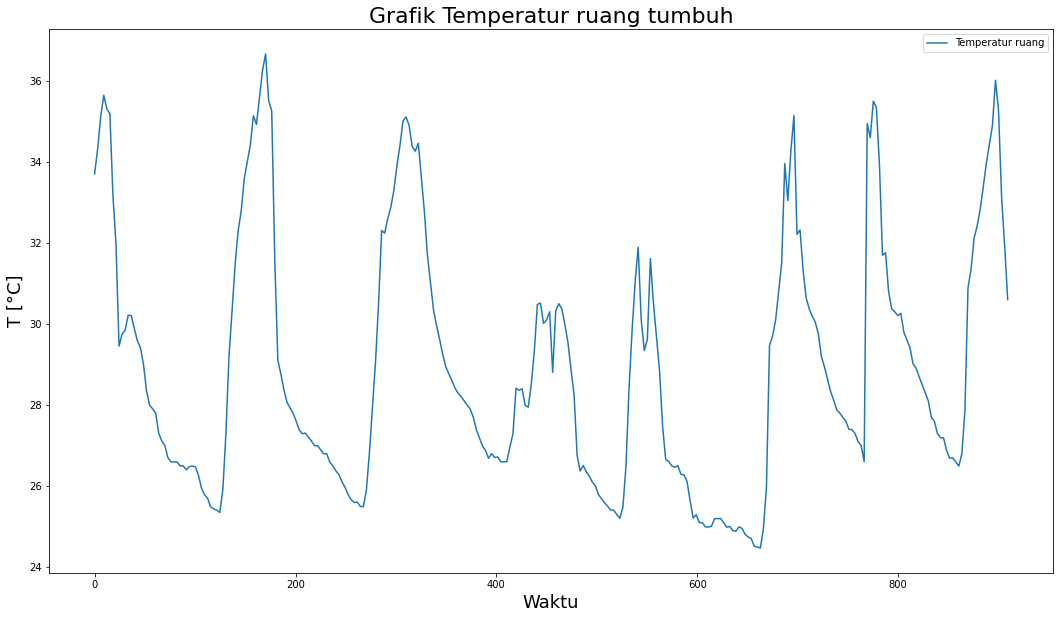

In [ ]:
# create integers from strings
idx = range(len(timeVariableVisualizationWeek4.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek4['roomTemperature'], k=3)
# spl2 = make_interp_spline(idx, timeVariableVisualizationWeek4['roomHumidity'], k=3)
smooth = spl(xnew)
# smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth)
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

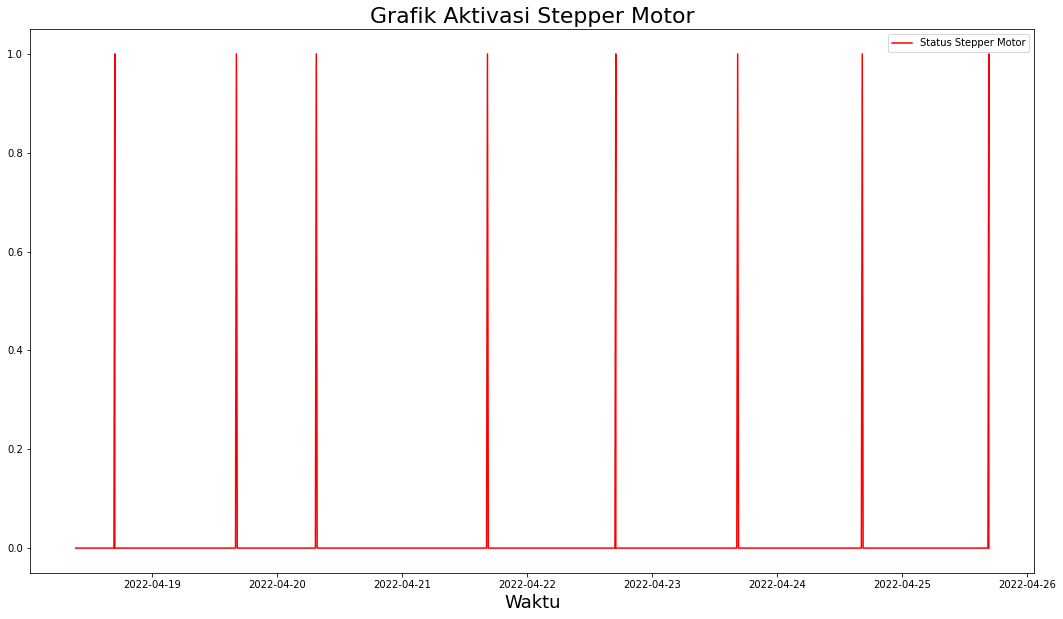

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek4['status'], color='red')
plt.legend(['Status Stepper Motor'], loc ="upper right")
plt.title('Grafik Aktivasi Stepper Motor', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('', fontsize=18)
plt.show()

## Week 5

In [ ]:
timeVariableVisualizationWeek5 = df[df.week == 5]
timeVariableVisualizationWeek5.tail(5)

,percentageSoilSensor2,roomHumidity,roomTemperature,status,week
Date,,,,,
2022-04-28 12:24:46.560,95,97.3,33.4,0.0,5
2022-04-28 12:34:47.031,95,98.6,32.6,0.0,5
2022-04-28 12:44:46.534,95,98.4,32.9,0.0,5
2022-04-28 12:54:46.546,95,97.5,33.6,0.0,5
2022-04-28 13:36:27.231,91,97.2,34.5,0.0,5


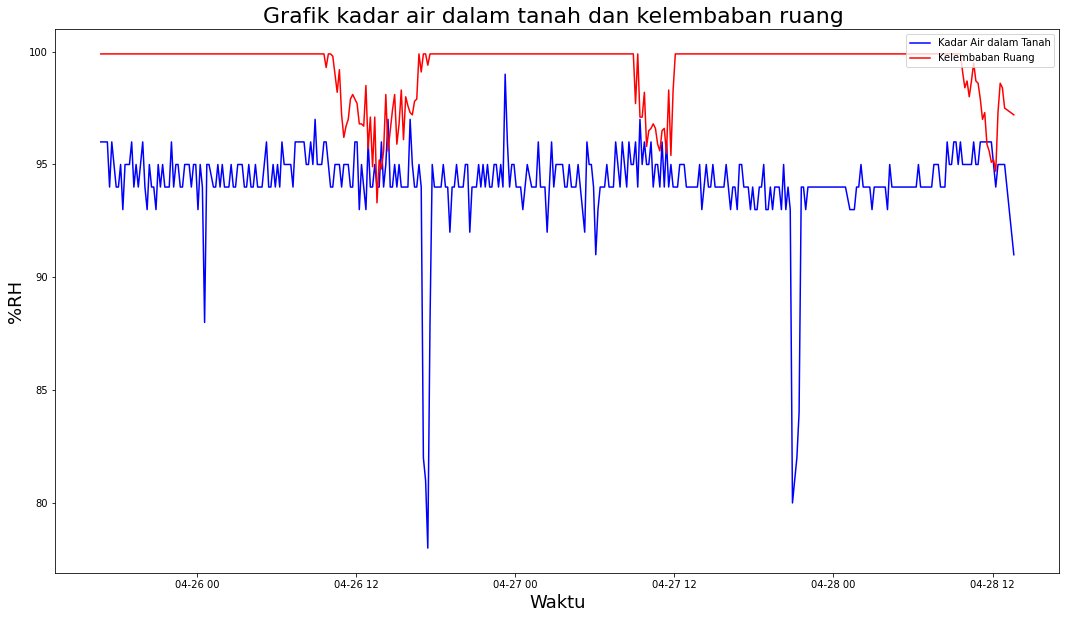

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek5['percentageSoilSensor2'], color='blue')
plt.plot(timeVariableVisualizationWeek5['roomHumidity'], color='red')
# plt.plot(timeVariableVisualizationWeek5['roomTemperature'], color='red')
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

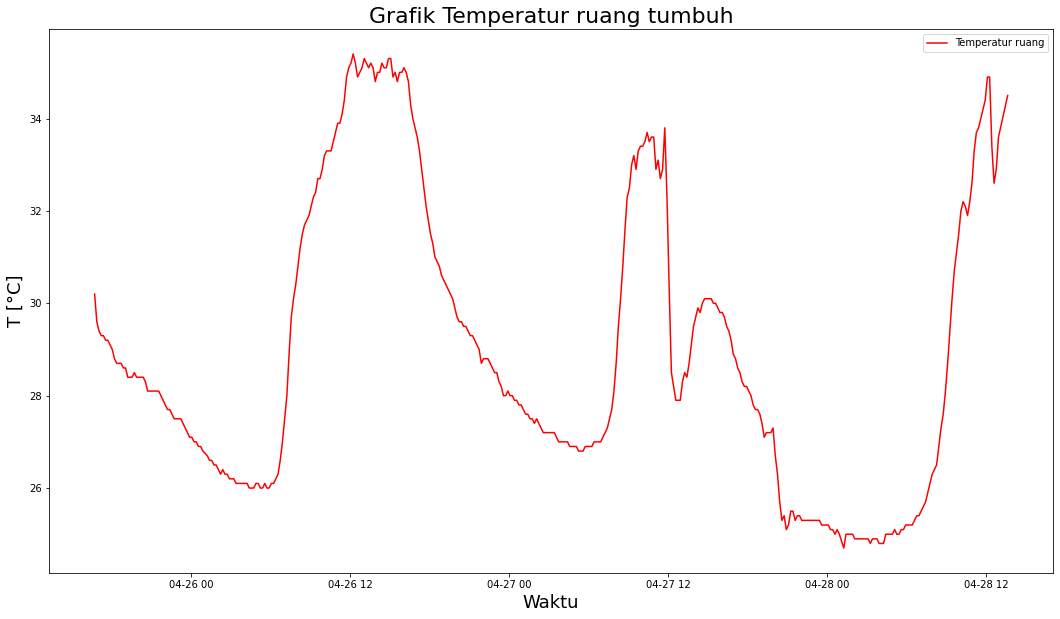

In [ ]:
plt.figure(figsize=(18,10))
# plt.plot(timeVariableVisualizationWeek5['percentageSoilSensor2'], color='yellow')
# plt.plot(timeVariableVisualizationWeek5['roomHumidity'], color='red')
plt.plot(timeVariableVisualizationWeek5['roomTemperature'], color='red')
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# create integers from strings
idx = range(len(timeVariableVisualizationWeek5.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek5['percentageSoilSensor2'], k=3)
spl2 = make_interp_spline(idx, timeVariableVisualizationWeek5['roomHumidity'], k=3)
smooth = spl(xnew)
smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth, linestyle='dashed')
plt.plot(xnew, smooth2)
plt.legend(['Kadar Air dalam Tanah','Kelembaban Ruang'], loc ="upper right")
plt.title('Grafik kadar air dalam tanah dan kelembaban ruang ', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('%RH', fontsize=18)
plt.show()

NameError: ignored

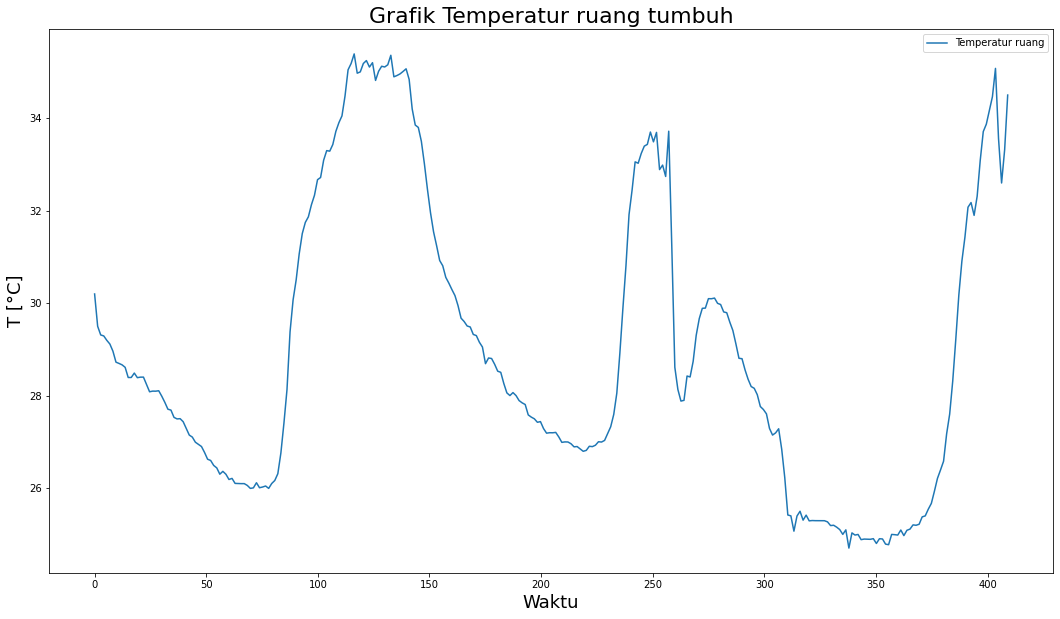

In [ ]:
# create integers from strings
idx = range(len(timeVariableVisualizationWeek5.index))
xnew = np.linspace(min(idx), max(idx), 300)

# interpolation
spl = make_interp_spline(idx, timeVariableVisualizationWeek5['roomTemperature'], k=3)
# spl2 = make_interp_spline(idx, timeVariableVisualizationWeek5['roomHumidity'], k=3)
smooth = spl(xnew)
# smooth2 = spl2(xnew)

# plotting, and tick replacement
plt.figure(figsize=(18,10))
plt.plot(xnew, smooth)
plt.legend(['Temperatur ruang'], loc ="upper right")
plt.title('Grafik Temperatur ruang tumbuh', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('T [°C]', fontsize=18)
plt.show()

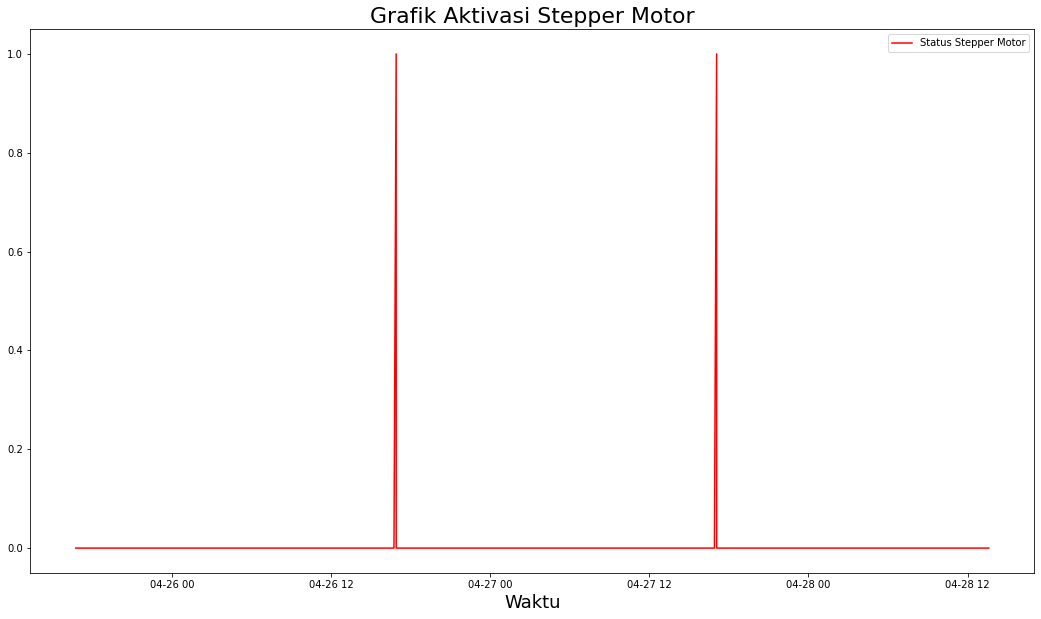

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek5['status'], color='red')
plt.legend(['Status Stepper Motor'], loc ="upper right")
plt.title('Grafik Aktivasi Stepper Motor', fontsize=22)
plt.xlabel('Waktu', fontsize=18)
plt.ylabel('', fontsize=18)
plt.show()